In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("intents_data.csv")
df.head(5)

Text      Intent
0        how are you  small_talk
1          what's up  small_talk
2  how are you doing  small_talk
3    how about today  small_talk
4     how are things  small_talk

In [27]:
df.Intent.value_counts()

small_talk    101
thanks        100
help          100
predict       100
get           100
set           100
get_past      100
calculate     100
definition    100
quit           97
Name: Intent, dtype: int64

In [28]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [29]:
intent = df.Intent.map({
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "get_past": 6,
    "calculate": 7,
    "definition": 8,
    "quit": 9
})

intent

0      0
1      0
2      0
3      0
4      0
      ..
993    8
994    8
995    8
996    8
997    8
Name: Intent, Length: 998, dtype: int64

In [30]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [31]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [32]:
text = df.Text.apply(preprocess)

In [33]:
text

0                                    how be you
1                                    what be up
2                                 how be you do
3                               how about today
4                                  how be thing
                         ...                   
993           what be another word for ' word '
994      be there a technical term for ' word '
995    let I see ' word ' define in simple term
996            could you clarify ' word ' for I
997                       what do ' word ' mean
Name: Text, Length: 998, dtype: object

In [34]:
df1 = pd.concat([text, intent], axis="columns")

In [35]:
df1

Text  Intent
0                                  how be you       0
1                                  what be up       0
2                               how be you do       0
3                             how about today       0
4                                how be thing       0
..                                        ...     ...
993         what be another word for ' word '       8
994    be there a technical term for ' word '       8
995  let I see ' word ' define in simple term       8
996          could you clarify ' word ' for I       8
997                     what do ' word ' mean       8

[998 rows x 2 columns]

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
v = TfidfVectorizer()

x = v.fit_transform(df1.Text.values).toarray()

In [38]:
y = df1.Intent

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [40]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.95
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.86      0.95      0.90        20
           2       1.00      1.00      1.00        20
           3       0.95      1.00      0.98        20
           4       0.91      1.00      0.95        20
           5       1.00      1.00      1.00        20
           6       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      0.70      0.82        20

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [41]:
{
    "predict": 0,
    "get": 1,
    "get_past": 2,
    "set": 3,
    "definition": 4,
    "impression": 5,
    "small_tack": 6,
    "quit": 7,
    "thanks": 8,
    "calculation": 9,
    "help": 10,
    "about": 11
}

phrases = "dd"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[0]
[[0.10150376 0.10025063 0.10025063 0.10025063 0.10025063 0.10025063
  0.10025063 0.10025063 0.10025063 0.09649123]]


Text(45.722222222222214, 0.5, 'Truth')

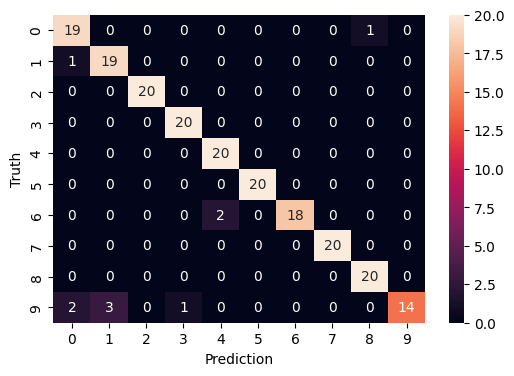

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [43]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.89
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.73      0.80      0.76        20
           2       0.83      0.95      0.88        20
           3       0.95      0.90      0.92        20
           4       0.81      0.85      0.83        20
           5       0.95      1.00      0.98        20
           6       0.85      0.85      0.85        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      0.65      0.79        20

    accuracy                           0.89       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200



In [44]:
from  sklearn.svm import SVC

model = SVC(probability=True)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.955
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.77      1.00      0.87        20
           2       1.00      0.80      0.89        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.95      0.97        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       0.86      0.95      0.90        20

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.95      0.96       200



In [45]:
import joblib

# Save the model
joblib.dump(model, "intent_classification_model")

['intent_classification_model']

In [46]:
{
    "predict": 0,
    "get": 1,
    "get_past": 3,
    "set": 4,
    "definition": 5,
    "impression": 6,
    "small_tack": 7,
    "quit": 8,
    "thanks": 9,
    "calculation": 10,
    "help": 11,
    "about": 12
}

phrases = "xcn;lf"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[9]
[[0.08440299 0.13247088 0.02657476 0.02318893 0.0199576  0.0078048
  0.04562888 0.01482764 0.01441086 0.63073266]]


In [47]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.92
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.87      1.00      0.93        20
           2       0.90      0.90      0.90        20
           3       1.00      0.80      0.89        20
           4       0.95      0.95      0.95        20
           5       1.00      1.00      1.00        20
           6       0.95      0.90      0.92        20
           7       1.00      0.90      0.95        20
           8       1.00      1.00      1.00        20
           9       0.71      0.85      0.77        20

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200



In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.965
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        20
           3       0.95      1.00      0.98        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       1.00      0.90      0.95        20
           7       1.00      0.90      0.95        20
           8       1.00      1.00      1.00        20
           9       0.86      0.90      0.88        20

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.96       200



## Deep Learning